In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [43]:
#export 
from exp.nb_00 import *
import operator

def test(a,b, cmp, cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b), f"{cname}:\n{a}\n{b}"
    
def test_eq(a,b): test(a,b, operator.eq, '==')

In [5]:
test_eq(TEST, 'test')

# Get data

In [6]:
# export 
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [7]:
# fastai functino to download and unzip
path = datasets.download_data(MNIST_URL, ext='.gz');
path

PosixPath('/home/bf/.fastai/data/mnist.pkl.gz')

In [8]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [9]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape

In [10]:
x_train, x_train.shape, 
y_train, y_train.shape, 
y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [11]:
assert n==y_train.shape[0] == 50000

In [12]:
test_eq(c, 28*28)

In [14]:
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

In [16]:
#Select the backend used for rendering and GUI integration.
mpl.rcParams['image.cmap'] = 'gray'

In [17]:
img = x_train[1]
img.view(28, 28).type()

'torch.FloatTensor'

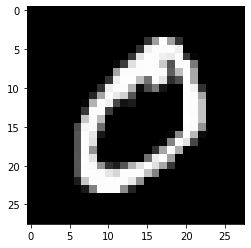

In [18]:
plt.imshow(img.view(28, 28))

In [19]:
weights = torch.randn(784, 10)

In [21]:
bias = torch.zeros(10)

In [22]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i, k] * b[k, j]
    return c

In [23]:
m1 = x_valid[:5]

In [24]:
m2 = weights

In [26]:
m1.shape # 5, 784

torch.Size([5, 784])

In [27]:
m2.shape

torch.Size([784, 10])

In [28]:
%time t1=matmul(m1, m2)

CPU times: user 651 ms, sys: 0 ns, total: 651 ms
Wall time: 742 ms


In [29]:
t1.shape

torch.Size([5, 10])

In [30]:
len(x_train)

50000

In [31]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [32]:
a.shape

torch.Size([3])

In [33]:
a+b

tensor([12., 14.,  3.])

In [34]:
(a<b).float().mean() # 2/3

tensor(0.6667)

In [36]:
m = tensor([[1., 2, 3],
            [4, 5, 6],
            [7, 8, 9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

In [37]:
(m*m).sum().sqrt()

tensor(16.8819)

Elementwise matmul

In [38]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:] * b[:, j]).sum()
            # a col * b row
    return c     

In [39]:
%timeit -n 10 _=matmul(m1, m2)

941 µs ± 38.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [116]:
742000/5

148400.0

In [41]:
#export
def near(a,b):
    # same value?
    return torch.allclose(a, b, rtol=1e-3, atol=1e-5)

def test_near(a,b):
    return test(a, b , near)

In [44]:
test_near(t1, matmul(m1, m2))

# Broadcasting

In [45]:
a

tensor([10.,  6., -4.])

In [46]:
a>0

tensor([1, 1, 0], dtype=torch.uint8)

In [47]:
a+1

tensor([11.,  7., -3.])

In [48]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [49]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [58]:
c = tensor([10., 20, 30]); c

tensor([10., 20., 30.])

In [59]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [60]:
m.shape

torch.Size([3, 3])

In [61]:
c.shape

torch.Size([3])

In [62]:
m+c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [63]:
t = c.expand_as(m)

In [64]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [65]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [66]:
t.stride()

(0, 1)

In [68]:
t.shape

torch.Size([3, 3])

In [69]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [70]:
c.unsqueeze(0).shape

torch.Size([1, 3])

In [71]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [72]:
c.unsqueeze(1).shape

torch.Size([3, 1])

In [73]:
c[None, :].shape # None = 1, None = unsqueeze dimension

torch.Size([1, 3])

In [74]:
c[:, None].shape

torch.Size([3, 1])

In [75]:
c[None, ...].shape

torch.Size([1, 3])

In [76]:
c[..., None].shape

torch.Size([3, 1])

In [77]:
# important for matmul
c[:, None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [87]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

In [88]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [78]:
m + c[:, None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [84]:
m * c.unsqueeze(-1)

tensor([[ 10.,  20.,  30.],
        [ 80., 100., 120.],
        [210., 240., 270.]])

In [86]:
(m * c.unsqueeze(-1)).sum(dim=0)

tensor([300., 360., 420.])

In [79]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

Matmul with broadcasting

In [89]:
def matmul(a, b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:] * b[:,j]).sum() # previous
        # a[i].unsqueeze(-1) = (3,1)
        # a[i].unsqueeze(-1) * b = (3,3) * (3,3)
        # sum(dim=0) = sum over d0 = matmul each row
        # each row in a * all columns in b > sum up all rows to be c[i]
        c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)
    return c

In [90]:
%timeit -n 10 _=matmul(m1, m2)

219 µs ± 5.53 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [117]:
742000/219

3388.1278538812785

In [92]:
test_near(t1, matmul(m1, m2))

Broadcasting Rules

In [93]:
c[None, :]

tensor([[10., 20., 30.]])

In [94]:
c[None, :].shape

torch.Size([1, 3])

In [95]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

In [96]:
c[:, None].shape

torch.Size([3, 1])

In [97]:
c[None, :] * c[:, None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [98]:
c[None] > c[:, None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [100]:
c[None].shape

torch.Size([1, 3])

In [105]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

In [106]:
c[None]

tensor([[10., 20., 30.]])

Einstein summation

In [118]:
def matmul(a,b):
    return torch.einsum('ik, kj->ij', a, b)

In [119]:
%timeit -n 10 _=matmul(m1, m2)

34.3 µs ± 6.26 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [120]:
742000/34

21823.529411764706

In [111]:
test_near(t1, matmul(m1, m2))

Pytorch op

In [123]:
%timeit -n 10 t2=m1.matmul(m2)

7.02 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
742000/7

106000.0

# Export

In [126]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py
